This is meant to check if you can convolude soil spectrums with their base elemental components. My intuition says that this will only work for mixutres, which will be tested later, but I need to check if it works for pure elements as well.


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from scipy.signal import convolve

In [193]:
sims_filename = "sims_01.csv"
sims_df = pd.read_csv(sims_filename)
sims_df

,soil_resolution,function,id,filename
0,7x7x7,Si,1000,7x7x7_Si_001000
1,7x7x7,Al,1001,7x7x7_Al_001001
2,7x7x7,H,1002,7x7x7_H_001002
3,7x7x7,Na,1003,7x7x7_Na_001003
4,7x7x7,O,1004,7x7x7_O_001004
5,7x7x7,Fe,1005,7x7x7_Fe_001005
6,7x7x7,Mg,1006,7x7x7_Mg_001006
7,7x7x7,C,1007,7x7x7_C_001007
8,7x7x7,SiO2,1008,7x7x7_SiO2_001008
9,7x7x7,Al2O3,1009,7x7x7_Al2O3_001009


In [194]:
pickle_files = 'specs/'+sims_df['filename']+'.pkl'
soil_resolutions = sims_df['soil_resolution']
res_info_files = 'ResInfo/res_info_'+soil_resolutions+'.json'
res_info_files

0     ResInfo/res_info_7x7x7.json
1     ResInfo/res_info_7x7x7.json
2     ResInfo/res_info_7x7x7.json
3     ResInfo/res_info_7x7x7.json
4     ResInfo/res_info_7x7x7.json
5     ResInfo/res_info_7x7x7.json
6     ResInfo/res_info_7x7x7.json
7     ResInfo/res_info_7x7x7.json
8     ResInfo/res_info_7x7x7.json
9     ResInfo/res_info_7x7x7.json
10    ResInfo/res_info_7x7x7.json
11    ResInfo/res_info_7x7x7.json
12    ResInfo/res_info_7x7x7.json
13    ResInfo/res_info_7x7x7.json
14    ResInfo/res_info_7x7x7.json
15    ResInfo/res_info_7x7x7.json
16    ResInfo/res_info_7x7x7.json
17    ResInfo/res_info_7x7x7.json
18    ResInfo/res_info_7x7x7.json
19    ResInfo/res_info_7x7x7.json
20    ResInfo/res_info_7x7x7.json
21    ResInfo/res_info_7x7x7.json
22    ResInfo/res_info_7x7x7.json
Name: soil_resolution, dtype: object

In [195]:
res_infos = [json.load(open(res_info_file, 'r')) for res_info_file in res_info_files]
detector_tally_idss = [[int(r) for r in res_info['detector_tally_ids']] for res_info in res_infos]
detector_tally_idss[0]

[808, 818, 828, 834, 836, 844, 846]

In [196]:
tally_t = 1
tally_data = [pickle.load(open(pickle_file, 'rb')) for pickle_file in pickle_files]
tally_binss = [td[0] for td in tally_data]
tally_spetra = [td[1] for td in tally_data]
detector_bins = [bins[tally_t][-2] for bins in tally_binss]
detector_spectra = [spec[tally_t] for spec in tally_spetra]

In [197]:
sims_df['filename']

0                  7x7x7_Si_001000
1                  7x7x7_Al_001001
2                   7x7x7_H_001002
3                  7x7x7_Na_001003
4                   7x7x7_O_001004
5                  7x7x7_Fe_001005
6                  7x7x7_Mg_001006
7                   7x7x7_C_001007
8                7x7x7_SiO2_001008
9               7x7x7_Al2O3_001009
10                7x7x7_H2O_001010
11               7x7x7_Na2O_001011
12              7x7x7_Fe2O3_001012
13                7x7x7_MgO_001013
14             7x7x7_Silica_001014
15          7x7x7_Kaolinite_001015
16           7x7x7_Smectite_001016
17    7x7x7_Montmorillonite_001017
18             7x7x7_Quartz_001018
19           7x7x7_Chlorite_001019
20               7x7x7_Mica_001020
21           7x7x7_Feldspar_001021
22            7x7x7_Coconut_001022
Name: filename, dtype: object

In [198]:
elem_map_folder = 'ElemMaps/ELEMS_'
elem_map_files = elem_map_folder + sims_df['function'] + '_'+sims_df['soil_resolution'] + '.csv'

In [199]:
elem_map_files

0                  ElemMaps/ELEMS_Si_7x7x7.csv
1                  ElemMaps/ELEMS_Al_7x7x7.csv
2                   ElemMaps/ELEMS_H_7x7x7.csv
3                  ElemMaps/ELEMS_Na_7x7x7.csv
4                   ElemMaps/ELEMS_O_7x7x7.csv
5                  ElemMaps/ELEMS_Fe_7x7x7.csv
6                  ElemMaps/ELEMS_Mg_7x7x7.csv
7                   ElemMaps/ELEMS_C_7x7x7.csv
8                ElemMaps/ELEMS_SiO2_7x7x7.csv
9               ElemMaps/ELEMS_Al2O3_7x7x7.csv
10                ElemMaps/ELEMS_H2O_7x7x7.csv
11               ElemMaps/ELEMS_Na2O_7x7x7.csv
12              ElemMaps/ELEMS_Fe2O3_7x7x7.csv
13                ElemMaps/ELEMS_MgO_7x7x7.csv
14             ElemMaps/ELEMS_Silica_7x7x7.csv
15          ElemMaps/ELEMS_Kaolinite_7x7x7.csv
16           ElemMaps/ELEMS_Smectite_7x7x7.csv
17    ElemMaps/ELEMS_Montmorillonite_7x7x7.csv
18             ElemMaps/ELEMS_Quartz_7x7x7.csv
19           ElemMaps/ELEMS_Chlorite_7x7x7.csv
20               ElemMaps/ELEMS_Mica_7x7x7.csv
21           

In [200]:
elem_maps = [pd.read_csv(elem_map_file) for elem_map_file in elem_map_files]

In [201]:
elem_maps[0]

,Unnamed: 0,9000,9001,9002,9003,9004,9005,9006,9007,9008,...,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342
0,14028,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,13027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,26000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
elem_names = ['Si', 'Al', 'H', 'Na', 'O', 'Fe', 'Mg', 'C']
elem_labels = ['14028', '13027', '1001', '11023', '8016', '26000', '12024', '6000']
elem_densities = [2.33, 2.70, 0.001, 0.97, 0.00143, 7.87, 1.74, 2.33]


In [203]:
elem_functions = elem_names
elem_is = [i for i, name in enumerate(elem_functions) if any(elem in name for elem in elem_names)]
elem_is

[0, 1, 2, 3, 4, 5, 6, 7]

In [204]:
elem_spectra = [detector_spectra[elem_i] for elem_i in elem_is]


In [205]:
len(detector_spectra)

23

In [206]:
compound_functions = ['SiO2', 'Al2O3', 'H2O', 'Na2O', 'Fe2O3', 'MgO']
compound_is = [i for i, name in enumerate(sims_df['function']) if any(compound in name for compound in compound_functions)]
compound_spectra = [detector_spectra[compound_i] for compound_i in compound_is]

In [207]:
compound_is

[8, 9, 10, 11, 12, 13]

In [208]:
compound_functions[0]

'SiO2'

In [209]:
sims_df['function'][compound_is[0]]

'SiO2'

In [210]:
compound_names = [sims_df['function'][compound_i] for compound_i in compound_is]

In [211]:
compound_names

['SiO2', 'Al2O3', 'H2O', 'Na2O', 'Fe2O3', 'MgO']

In [212]:
compound_elem_maps = [elem_maps[compound_i][elem_maps[compound_i].columns[1]] for compound_i in compound_is]

In [213]:
compound_elem_maps

[0    0.467437
 1    0.000000
 2    0.000000
 3    0.000000
 4    0.532563
 5    0.000000
 6    0.000000
 7    0.000000
 Name: 9000, dtype: float64,
 0    0.000000
 1    0.529257
 2    0.000000
 3    0.000000
 4    0.470743
 5    0.000000
 6    0.000000
 7    0.000000
 Name: 9000, dtype: float64,
 0    0.000000
 1    0.000000
 2    0.111907
 3    0.000000
 4    0.888093
 5    0.000000
 6    0.000000
 7    0.000000
 Name: 9000, dtype: float64,
 0    0.000000
 1    0.000000
 2    0.000000
 3    0.741862
 4    0.258138
 5    0.000000
 6    0.000000
 7    0.000000
 Name: 9000, dtype: float64,
 0    0.000000
 1    0.000000
 2    0.000000
 3    0.000000
 4    0.300569
 5    0.699431
 6    0.000000
 7    0.000000
 Name: 9000, dtype: float64,
 0    0.000000
 1    0.000000
 2    0.000000
 3    0.000000
 4    0.396958
 5    0.000000
 6    0.603042
 7    0.000000
 Name: 9000, dtype: float64]

In [214]:
compound_elem_maps[0].values

array([0.46743671, 0.        , 0.        , 0.        , 0.53256329,
       0.        , 0.        , 0.        ])

In [215]:
_compound_elem_map = compound_elem_maps[0].values.copy()

In [216]:
_compound_elem_map.shape

(8,)

In [217]:

elem_spectra_np = np.array(elem_spectra).squeeze()

__compound_elem_map = np.zeros((len(elem_is), elem_spectra_np.shape[-1]))
for i, elem_i in enumerate(elem_is):
    __compound_elem_map[i, :] = _compound_elem_map[i]
_compound_elem_map = __compound_elem_map

In [218]:
elem_spectra_np.shape

(8, 935)

In [219]:
_compound_elem_map.shape

(8, 935)

In [220]:
convolve(elem_spectra_np, _compound_elem_map).shape

(15, 1869)

In [221]:
(elem_spectra_np*_compound_elem_map).sum(axis=0).shape

(935,)

In [222]:
compound_spectra_np = np.array(compound_spectra).squeeze()

In [225]:
compound_spectra_np[0].shape

(935,)

In [227]:
detector_bins[0]

(0.0,
 1e-05,
 0.00904482,
 0.0180796,
 0.0271145,
 0.0361493,
 0.0451841,
 0.0542189,
 0.0632538,
 0.0722886,
 0.0813234,
 0.0903582,
 0.0993931,
 0.108428,
 0.117463,
 0.126498,
 0.135532,
 0.144567,
 0.153602,
 0.162637,
 0.171672,
 0.180706,
 0.189741,
 0.198776,
 0.207811,
 0.216846,
 0.225881,
 0.234915,
 0.24395,
 0.252985,
 0.26202,
 0.271055,
 0.28009,
 0.289124,
 0.298159,
 0.307194,
 0.316229,
 0.325264,
 0.334298,
 0.343333,
 0.352368,
 0.361403,
 0.370438,
 0.379473,
 0.388507,
 0.397542,
 0.406577,
 0.415612,
 0.424647,
 0.433682,
 0.442716,
 0.451751,
 0.460786,
 0.469821,
 0.478856,
 0.48789,
 0.496925,
 0.50596,
 0.514995,
 0.52403,
 0.533065,
 0.542099,
 0.551134,
 0.560169,
 0.569204,
 0.578239,
 0.587274,
 0.596308,
 0.605343,
 0.614378,
 0.623413,
 0.632448,
 0.641482,
 0.650517,
 0.659552,
 0.668587,
 0.677622,
 0.686657,
 0.695691,
 0.704726,
 0.713761,
 0.722796,
 0.731831,
 0.740865,
 0.7499,
 0.758935,
 0.76797,
 0.777005,
 0.78604,
 0.795074,
 0.804109,
 0.81

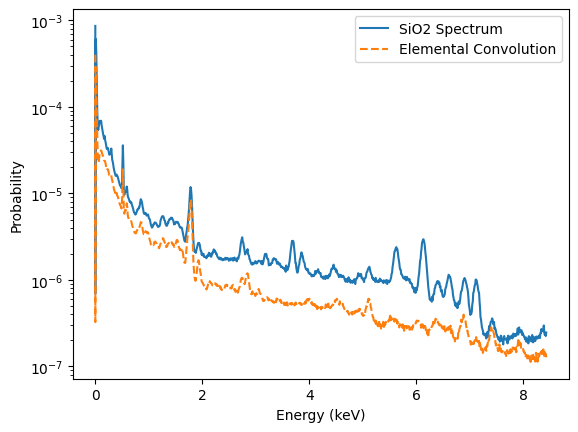

In [232]:
plt.plot(detector_bins[0], compound_spectra_np[0], label=f'{compound_names[0]} Spectrum')
plt.plot(detector_bins[0], (elem_spectra_np*_compound_elem_map).sum(axis=0), label='Elemental Convolution', linestyle='--')
plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Probability')
plt.yscale('log')